In [469]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score, confusion_matrix,matthews_corrcoef

In [470]:
df=pd.read_csv('weatherAUS_classification.csv',parse_dates=['Date'])

In [471]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-05-18,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No
1,2009-07-03,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,No
2,2010-02-18,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No
3,2010-03-04,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No
4,2010-09-09,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,No


In [472]:
df.shape

(36881, 23)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           36881 non-null  datetime64[ns]
 1   Location       36881 non-null  object        
 2   MinTemp        36543 non-null  float64       
 3   MaxTemp        36639 non-null  float64       
 4   Rainfall       36255 non-null  float64       
 5   Evaporation    24035 non-null  float64       
 6   Sunshine       23317 non-null  float64       
 7   WindGustDir    33513 non-null  object        
 8   WindGustSpeed  33520 non-null  float64       
 9   WindDir9am     34072 non-null  object        
 10  WindDir3pm     35919 non-null  object        
 11  WindSpeed9am   36219 non-null  float64       
 12  WindSpeed3pm   36235 non-null  float64       
 13  Humidity9am    36311 non-null  float64       
 14  Humidity3pm    36370 non-null  float64       
 15  Pressure9am    3330

In [474]:
round((df.isnull().sum()/df.shape[0])*100,2)

Date              0.00
Location          0.00
MinTemp           0.92
MaxTemp           0.66
Rainfall          1.70
Evaporation      34.83
Sunshine         36.78
WindGustDir       9.13
WindGustSpeed     9.11
WindDir9am        7.62
WindDir3pm        2.61
WindSpeed9am      1.79
WindSpeed3pm      1.75
Humidity9am       1.55
Humidity3pm       1.39
Pressure9am       9.69
Pressure3pm       9.63
Cloud9am         33.89
Cloud3pm         35.20
Temp9am           1.32
Temp3pm           1.20
RainToday         1.70
RainTomorrow      1.68
dtype: float64

In [475]:
null=pd.DataFrame(df.isnull().sum())

In [476]:
(null.sum()/df.shape[0])*100
# Hence we should not remove the null values

0    204.137632
dtype: float64

# Data Pre-processing

1. Removing missing values

In [477]:
df1=df.copy()

Evaporation,sunshine, cloud9am and cloud3pm have null values more than 30%, still they are important variables and we are not removing them. 


In [478]:
df.select_dtypes('float').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [479]:
num=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']


In [480]:
df1[num]=df[num].fillna(df[num].median()) #replacing the null values with median for numerical data

In [481]:
df1.RainTomorrow.isnull().sum()

620

In [482]:
categorical=df.select_dtypes('object').columns

In [483]:
df1[categorical]=df[categorical].fillna(df[categorical].mode())

In [484]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-05-18,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No
1,2009-07-03,Launceston,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,No,No
2,2010-02-18,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No
3,2010-03-04,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No
4,2010-09-09,GoldCoast,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,No,No


In [485]:
#replacing the values by mode
df1['WindGustDir'].fillna('SE',inplace=True)
df1['WindDir9am'].fillna('N',inplace=True)
df1['WindDir3pm'].fillna('SE',inplace=True)
df1['RainToday'].fillna('No',inplace=True)

In [486]:
df1.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow     620
dtype: int64

In [487]:
df1.dropna(inplace=True)

In [488]:
#Checking for duplicates
df1[df1.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [489]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Rainfall'>

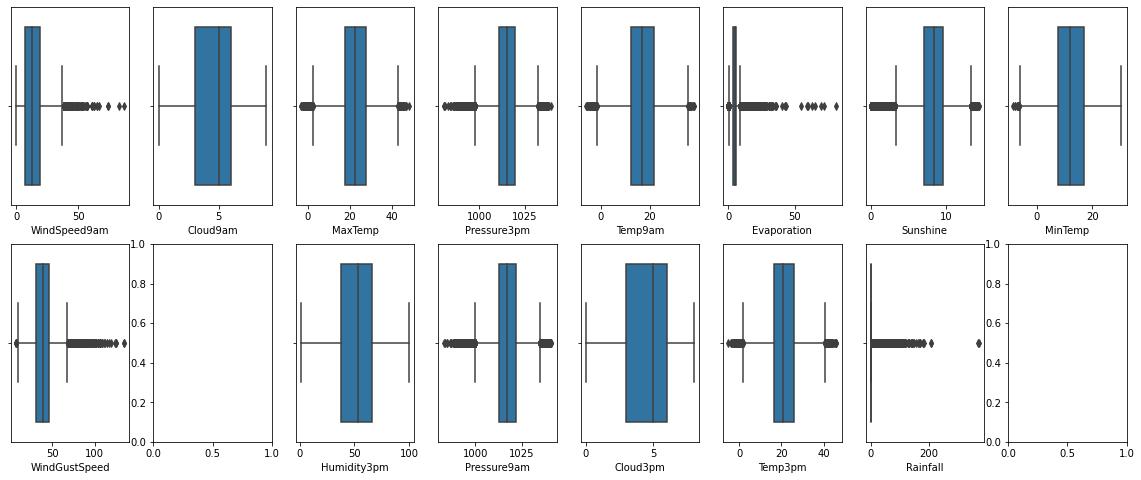

In [490]:
f,ax=plt.subplots(2,8,figsize=(20,8))
sns.boxplot('WindSpeed9am',data=df1,ax=ax[0,0])
sns.boxplot('Cloud9am',data=df1,ax=ax[0,1])
sns.boxplot('MaxTemp',data=df1,ax=ax[0,2])
sns.boxplot('Pressure3pm',data=df1,ax=ax[0,3])
sns.boxplot('Temp9am',data=df1,ax=ax[0,4])
sns.boxplot('Evaporation',data=df1,ax=ax[0,5])
sns.boxplot('Sunshine',data=df1,ax=ax[0,6])
sns.boxplot('MinTemp',data=df1,ax=ax[0,7])
sns.boxplot('WindGustSpeed',data=df1,ax=ax[1,0])
sns.boxplot('Humidity3pm',data=df1,ax=ax[1,2])
sns.boxplot('Pressure9am',data=df1,ax=ax[1,3])
sns.boxplot('Cloud3pm',data=df1,ax=ax[1,4])
sns.boxplot('Temp3pm',data=df1,ax=ax[1,5])

sns.boxplot('Rainfall',data=df1,ax=ax[1,6])




{'whiskers': [<matplotlib.lines.Line2D at 0x2339b8d5dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2339b5224c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2339b8d5a30>],
 'medians': [<matplotlib.lines.Line2D at 0x2339b522b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2339b522f10>],
 'means': []}

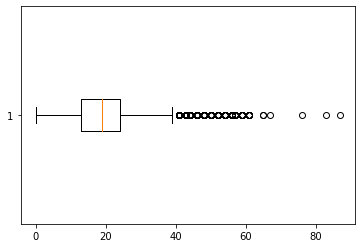

In [491]:
plt.boxplot(df1['WindSpeed3pm'],vert=False)

In [492]:
df1.shape

(36261, 23)

There are many outliers in the data.
Cloud9am and Cloud3pm are negatively skewed, others are mostly positively skewed.

<AxesSubplot:>

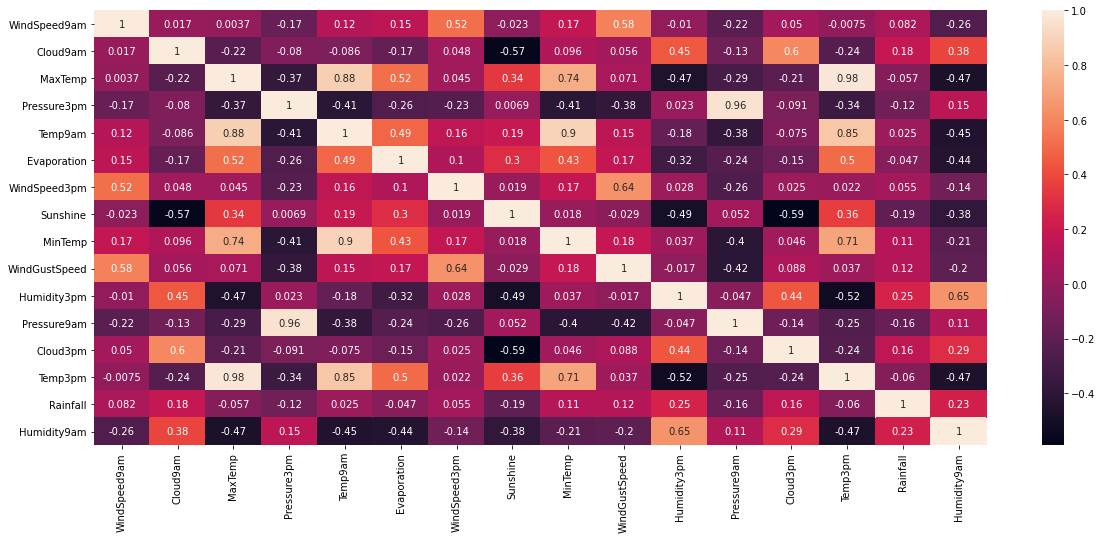

In [493]:
plt.subplots(figsize=(20,8))
sns.heatmap(df1[['WindSpeed9am',
 'Cloud9am',
 'MaxTemp',
 'Pressure3pm',
 'Temp9am',
 'Evaporation',
 'WindSpeed3pm',
 'Sunshine',
 'MinTemp',
 'WindGustSpeed',
 'Humidity3pm',
 'Pressure9am',
 'Cloud3pm',
 'Temp3pm',
 'Rainfall',
 'Humidity9am']].corr(),annot=True)

array([[<AxesSubplot:title={'center':'MinTemp'}>]], dtype=object)

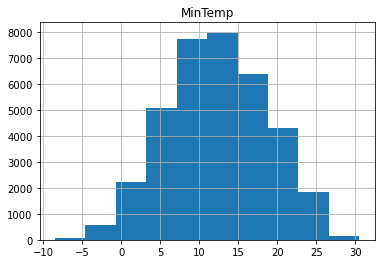

In [494]:
df1.hist('MinTemp')

2. Outlier removal

In [495]:
df_float=df1.select_dtypes('float')
df_float.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3
1,1.1,14.5,0.4,4.6,8.4,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1
4,14.6,25.3,0.0,4.6,8.4,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6


In [496]:
df1.select_dtypes('object').head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Hobart,NW,WSW,SSE,No,No
1,Launceston,SSW,E,SW,No,No
2,Williamtown,SSE,SSE,SSE,No,No
3,PerthAirport,SW,SSE,SW,No,No
4,GoldCoast,NNW,WNW,N,No,No


In [497]:
def outlier_removal(dataframe, dataframe2, limit = 1.5):
        
    for col in dataframe2:           # This is for the variables to be treated from upper right whisker
        rw = limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)) + dataframe[col].quantile(0.75)
        lw= dataframe[col].quantile(0.25)-(limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)))  
        dataframe = dataframe[~(dataframe[col]>rw)]
        dataframe = dataframe[~(dataframe[col]<lw)]
        dataframe = dataframe   
    
    return dataframe

In [498]:
df1.shape

(36261, 23)

In [499]:
df2 = outlier_removal(df1, df_float, limit = 1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x2339bac4400>,
 'caps': [<matplotlib.lines.Line2D at 0x2339bac4ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2339bac4070>],
 'medians': [<matplotlib.lines.Line2D at 0x2339bacd1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2339bacd520>],
 'means': []}

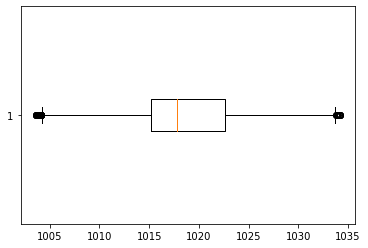

In [500]:
plt.boxplot(df2['Pressure9am'],vert=False)

In [501]:
df2.shape


(19674, 23)

# Label Encoding

In [502]:
str_cols = df2.select_dtypes('object').columns

df_str = df2[str_cols].astype('str')

from sklearn.preprocessing import LabelEncoder
df_str = df_str.apply(LabelEncoder().fit_transform)
df_str.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,15,7,15,10,0,0
2,42,10,10,10,0,0
3,30,12,10,12,0,0
4,14,6,14,3,0,0
6,26,9,1,5,0,0


In [503]:
df2[str_cols]=df_str

In [504]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-05-18,15,5.1,14.3,0.0,1.8,8.9,7,30.0,15,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,0,0
2,2010-02-18,42,19.7,26.2,0.0,7.2,7.2,10,41.0,10,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,0,0
3,2010-03-04,30,16.6,28.0,0.0,9.0,11.3,12,54.0,10,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,0,0
4,2010-09-09,14,14.6,25.3,0.0,4.6,8.4,6,43.0,14,...,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,0,0
6,2011-10-13,26,9.8,23.9,0.0,4.4,10.5,9,35.0,1,...,53.0,29.0,1017.8,1013.9,3.0,4.0,15.5,23.0,0,0


# Train-Test Split

In [505]:
(df2['RainTomorrow'].value_counts()/df2.shape[0])*100

0    86.743926
1    13.256074
Name: RainTomorrow, dtype: float64

In [506]:
from sklearn.model_selection import train_test_split
df2=df2.drop('Date',axis=1)

X=df2.drop('RainTomorrow',axis=1)
y=df2['RainTomorrow']

In [507]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size= 0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)

(13771, 21)
(5903, 21)


In [508]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

  
# standardization 
scale = pd.DataFrame(object.fit_transform(X_train)) 
X_train=scale
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(13771, 21)
(13771,)
(5903, 21)


In [509]:
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier(n_estimators = 800, max_depth = 10,
                                                  class_weight = "balanced",
                                                  random_state= 42)

In [510]:
randomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=800,
                       random_state=42)

In [511]:
X_train['pred']  = randomForestClassifier.predict(X_train)

print('Accuracy Score ->',round(accuracy_score(y_train, X_train['pred']),3))
print('Precision Score ->',round(precision_score(y_train, X_train['pred']),3))
print('Recall Score ->',round(recall_score(y_train, X_train['pred']),3))
print('F1 Score ->',round(f1_score(y_train, X_train['pred']),3))
print('\n')
print('***Confusion Matrix***')
confusion_matrix(y_train, X_train['pred'])

Accuracy Score -> 0.875
Precision Score -> 0.516
Recall Score -> 0.881
F1 Score -> 0.65


***Confusion Matrix***


array([[10460,  1500],
       [  215,  1596]], dtype=int64)

In [512]:
X_test.shape

(5903, 21)

In [513]:
X_test=pd.DataFrame(object.transform(X_test))

In [514]:
X_test['pred'] = randomForestClassifier.predict(X_test)

print('Accuracy Score ->',round(accuracy_score(y_test, X_test['pred']),3))
print('Precision Score ->',round(precision_score(y_test, X_test['pred']),3))
print('Recall Score ->',round(recall_score(y_test, X_test['pred']),3))
print('F1 Score ->',round(f1_score(y_test, X_test['pred']),3))
print('\n')
print('***Confusion Matrix***')
confusion_matrix(y_test, X_test['pred'])

Accuracy Score -> 0.818
Precision Score -> 0.389
Recall Score -> 0.61
F1 Score -> 0.475


***Confusion Matrix***


array([[4344,  762],
       [ 311,  486]], dtype=int64)

In [515]:
X_train.drop('pred',axis=1,inplace=True)
X_test.drop('pred',axis=1,inplace=True)

In [516]:
decision_tree_model = DecisionTreeClassifier(class_weight = "balanced",
                                                  random_state= 42,max_depth=10)

In [517]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [518]:
X_train['pred']  = decision_tree_model.predict(X_train)

print('Accuracy Score ->',round(accuracy_score(y_train, X_train['pred']),3))
print('Precision Score ->',round(precision_score(y_train, X_train['pred']),3))
print('Recall Score ->',round(recall_score(y_train, X_train['pred']),3))
print('F1 Score ->',round(f1_score(y_train, X_train['pred']),3))
print('\n')
print('***Confusion Matrix***')
confusion_matrix(y_train, X_train['pred'])

Accuracy Score -> 0.778
Precision Score -> 0.364
Recall Score -> 0.923
F1 Score -> 0.522


***Confusion Matrix***


array([[9039, 2921],
       [ 139, 1672]], dtype=int64)

In [519]:
X_test['pred'] = decision_tree_model.predict(X_test)

print('Accuracy Score ->',round(accuracy_score(y_test, X_test['pred']),3))
print('Precision Score ->',round(precision_score(y_test, X_test['pred']),3))
print('Recall Score ->',round(recall_score(y_test, X_test['pred']),3))
print('F1 Score ->',round(f1_score(y_test, X_test['pred']),3))
print('\n')
print('***Confusion Matrix***')
confusion_matrix(y_test, X_test['pred'])

Accuracy Score -> 0.708
Precision Score -> 0.262
Recall Score -> 0.642
F1 Score -> 0.372


***Confusion Matrix***


array([[3665, 1441],
       [ 285,  512]], dtype=int64)